# Attractor trajectories generation

This notes contains code for generating timeseries of the attractors listed below. Lorenz, Rossler, Rabinovich-Fabrikant, Multiscroll and Doublescroll are all tridimensional attractors regulated by a system of differential equations. Duffing is one dimensional. Henon is a discrete time one dimensional system. NARMA (non-linear auto-regressive moving average) is a one dimensional discrete time method.

- Lorenz

- Rossler

- Duffing

- Rabinovich Fabrikant

- Multiscroll

- Doublescroll

- NARMA

- Henon

##### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
import random 
import reservoirpy.datasets as rsvp_d # For the automatic generation of attractors

##### Functions

In [19]:
def Plot2D(xs, ys, zs, titl1, titl2, titl3, start, pt_number, lw):
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15, 5))

    ax1.plot(xs[start:start+pt_number], ys[start:start+pt_number], lw=lw)
    ax1.set_title(titl1)
    ax1.set_xlabel("X Axis")
    ax1.set_ylabel("Y Axis")

    ax2.plot(xs[start:start+pt_number], zs[start:start+pt_number], lw=lw)
    ax2.set_title(titl2)
    ax2.set_xlabel("X Axis")
    ax2.set_ylabel("Z Axis")

    ax3.plot(ys[start:start+pt_number], zs[start:start+pt_number], lw=lw)
    ax3.set_title(titl3)
    ax3.set_xlabel("Y Axis")
    ax3.set_ylabel("Z Axis")

    plt.show()


def show_val(vals, name):
    print ("Name:", name, "val:", vals[name])
#vals = {'a': 1, 'b': 2}
#show_val(vals, 'b')
#Name: b val: 2


def Plot3D(xs, ys, zs, title, start, pt_number, lw):
    ax = plt.figure().add_subplot(projection='3d')
    ax.plot(xs[start:start+pt_number], ys[start:start+pt_number], zs[start:start+pt_number], lw=lw)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title(title)
    plt.show()

##### Data saving

In [25]:
# If set to True, will update ALL the datasets.
# In alternative, to update a single dataset, it convenient to set to True its specific save_data parameter
save_data = True

path_savedata = 'data_attractors/'

## Lorenz attractor

#### Lorenz attractor - generation

In [35]:
Lorenz_method = 2
if Lorenz_method == 1:
    t1 = time.time() #times the computation
    def lorenz(x, y, z, s=10, r=28, b=2.667):
        """
        Given:
        x, y, z: a point of interest in three dimensional space
        s, r, b: parameters defining the lorenz attractor
        Returns:
        x_dot, y_dot, z_dot: values of the lorenz attractor's partial
            derivatives at the point x, y, z
        """
        x_dot = s*(y - x)
        y_dot = r*x - y - x*z
        z_dot = x*y - b*z
        return x_dot, y_dot, z_dot


    dt = 0.01 #was 0.01
    num_steps = 100000

    # Need one more for the initial values
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)

    # Set initial values
    xs[0], ys[0], zs[0] = (0., 1., 1.01) #z was 1.05

    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    t2 = time.time()
    print ('computation takes ',t2-t1,' seconds.')


if Lorenz_method == 2:
    t1 = time.time() #times the computation
    dataset = rsvp_d.lorenz(100000, rho=28.0, sigma=10.0, beta=2.6666666666666665, x0=[1.0, 1.0, 1.0], h=0.03)
    xs = dataset[:,0]
    ys = dataset[:,1]
    zs = dataset[:,2]
    t2 = time.time()
    print ('computation takes ',t2-t1,' seconds.')

computation takes  15.047597885131836  seconds.


#### Lorenz attractor - plots

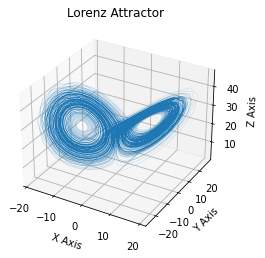

In [36]:
Plot3D(xs, ys, zs, "Lorenz Attractor", start=0, pt_number=10000, lw=0.1)

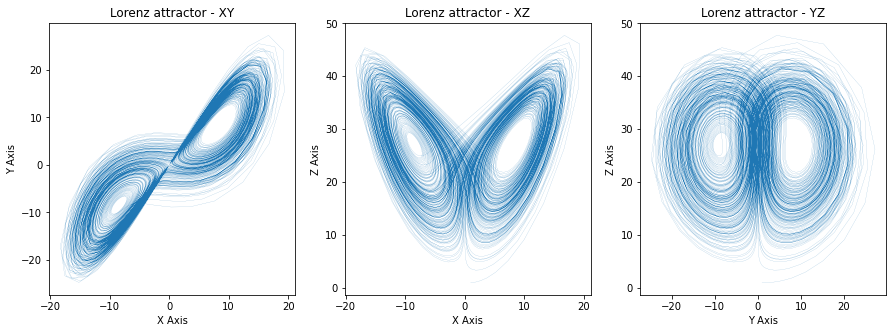

In [37]:
Plot2D(xs, ys, zs, "Lorenz attractor - XY", "Lorenz attractor - XZ", "Lorenz attractor - YZ", start=0, pt_number=10000, lw=0.1)

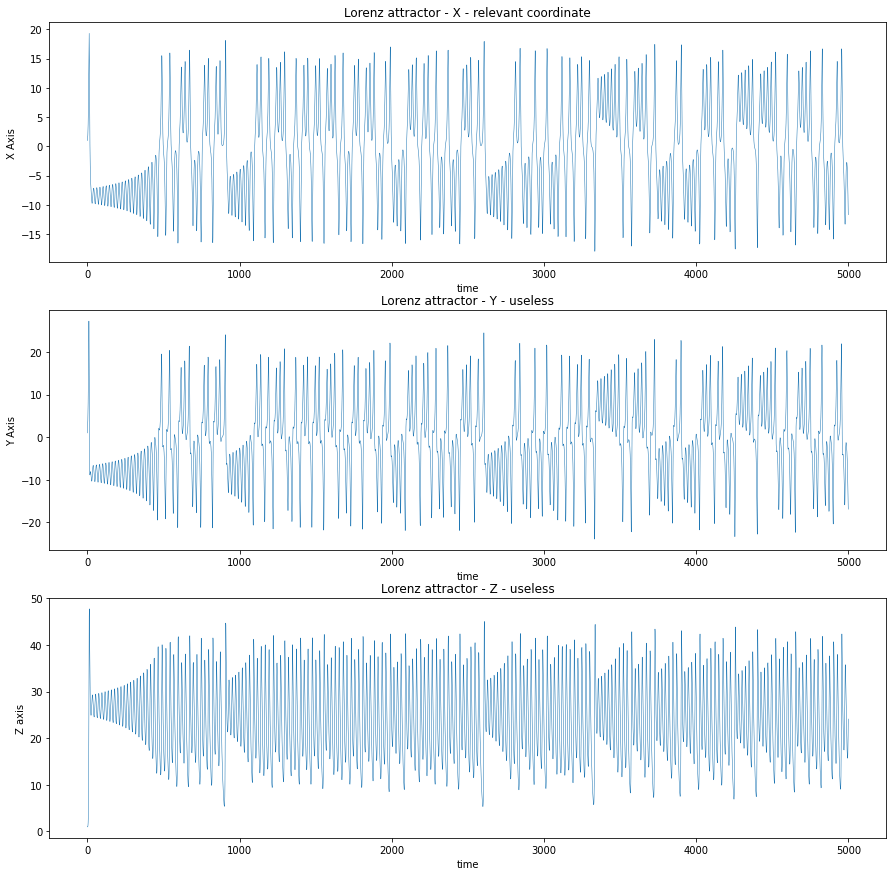

In [38]:
# Plot 1D - relevant coordinate
start = 0
pt_number = 5000
lw = 0.5
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15, 15))

ax1.plot(xs[start:start+pt_number], lw=lw)
ax1.set_title("Lorenz attractor - X - relevant coordinate")
ax1.set_xlabel("time")
ax1.set_ylabel("X Axis")

ax2.plot(ys[start:start+pt_number], lw=lw)
ax2.set_title("Lorenz attractor - Y - useless")
ax2.set_xlabel("time")
ax2.set_ylabel("Y Axis")

ax3.plot(zs[start:start+pt_number], lw=lw)
ax3.set_title("Lorenz attractor - Z - useless")
ax3.set_xlabel("time")
ax3.set_ylabel("Z axis")

plt.show()

#### Lorenz attractor - data saving

In [26]:
save_Lorenz = False
if save_Lorenz or save_data:
    np.savetxt(path_savedata + 'Lorenz_timeseries.csv', np.array([xs, ys, zs]).T, delimiter = " ", header = "")
    print(xs[0:5], "\n", ys[0:5], "\n", zs[0:5])

[1.         1.10721892 1.40927574 1.9138408  2.66324778] 
 [1.         1.79829956 2.73893868 3.96934229 5.6505771 ] 
 [1.         0.96517068 0.97268411 1.05753588 1.29251682]


## Rossler attractor

#### Rossler attractor - generation

In [82]:
t1 = time.time() #times the computation

a = 0.2
b = 0.2
c = 5.7
t = 0
tf = 10000 #was 100
h = 0.1 #was 0.01
def derivative(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    return np.array([- y - z, x + a * y, b + z * (x - c)])
time_list = np.array([])
xs = np.array([])
ys = np.array([])
zs = np.array([])
r = np.array([0.1, 0.1, 0.1])
while (t <= tf ):
    
        time_list = np.append(time_list, t)
        zs = np.append(zs, r[2])
        ys = np.append(ys, r[1])
        xs = np.append(xs, r[0])
        
        k1 = h*derivative(r,t)
        k2 = h*derivative(r+k1/2,t+h/2)
        k3 = h*derivative(r+k2/2,t+h/2)
        k4 = h*derivative(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
        
        t = t + h

t2 = time.time()
print ('computation takes ',t2-t1,' seconds.')

computation takes  22.850029706954956  seconds.


#### Rossler attractor - plots

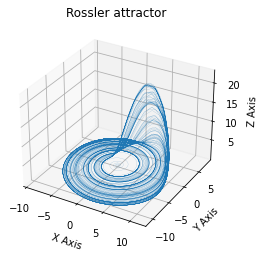

In [83]:
Plot3D(xs, ys, zs, "Rossler attractor", start=0, pt_number=10000, lw=0.1)

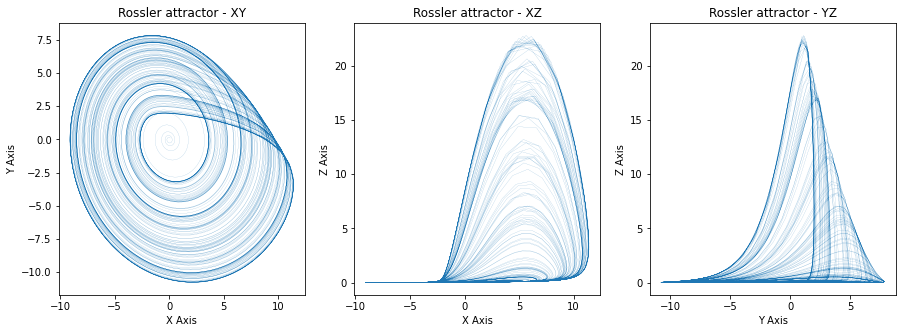

In [84]:
Plot2D(xs, ys, zs, "Rossler attractor - XY", "Rossler attractor - XZ", "Rossler attractor - YZ", start=0, pt_number=10000, lw=0.1)

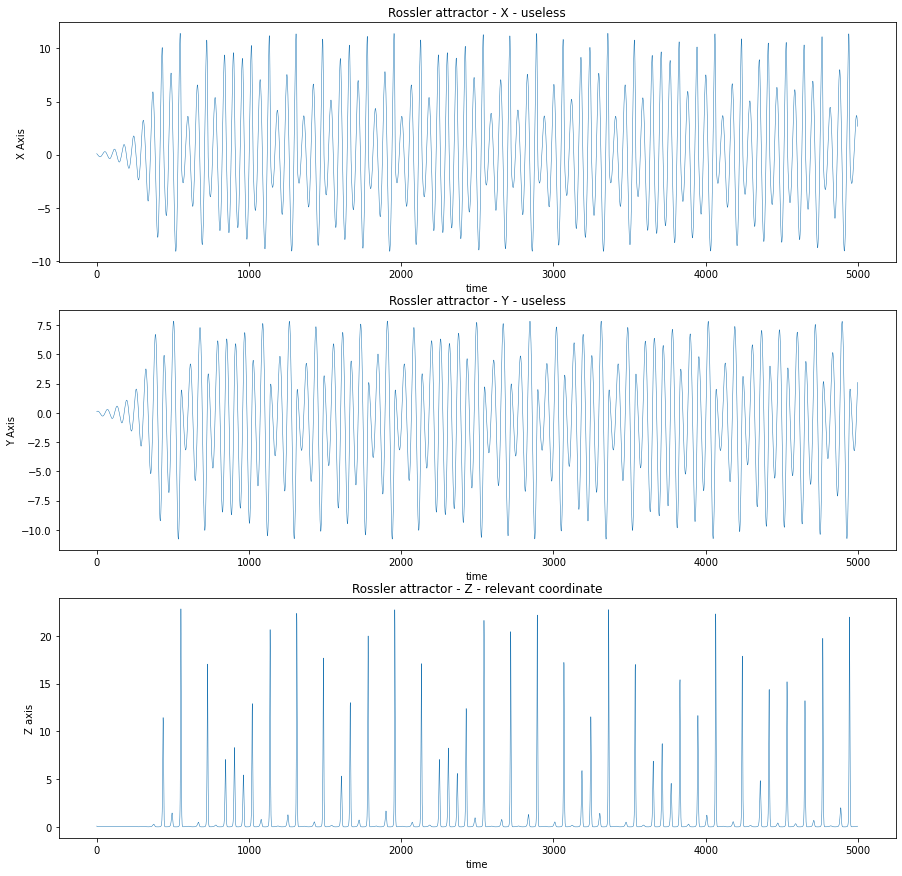

In [85]:
# Plot 1D - relevant coordinate

start = 0
pt_number = 5000
lw = 0.5
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (15, 15))

ax1.plot(xs[start:start+pt_number], lw=lw)
ax1.set_title("Rossler attractor - X - useless")
ax1.set_xlabel("time")
ax1.set_ylabel("X Axis")

ax2.plot(ys[start:start+pt_number], lw=lw)
ax2.set_title("Rossler attractor - Y - useless")
ax2.set_xlabel("time")
ax2.set_ylabel("Y Axis")

ax3.plot(zs[start:start+pt_number], lw=lw)
ax3.set_title("Rossler attractor - Z - relevant coordinate")
ax3.set_xlabel("time")
ax3.set_ylabel("Z axis")

plt.show()

#### Rossler attractor - data saving

In [86]:
save_Rossler = False
if save_Rossler or save_data:
    np.savetxt(path_savedata + 'Rossler_timeseries.csv', np.array([xs, ys, zs]).T, delimiter = " ", header = "")
    print(xs[0:5], "\n", ys[0:5], "\n", zs[0:5])

[0.1        0.08094187 0.06296765 0.0453377  0.02769608] 
 [0.1        0.11114671 0.12065706 0.12856592 0.13485523] 
 [0.1        0.07239752 0.05654595 0.04744079 0.04220013]


## Duffing attractor

#### Duffing attractor - generation

In [87]:
t1 = time.time() #times the computation

# parameters (mass = 1)
a = 0.5
b = 1/16.0
F_0 = 2.5
omega = 2.0
gamma = 0.1
h = 1e-2 # time step was 1e-1
period = 2*np.pi/(1.0*omega)
# length of the simulation
T = 100000
t = np.arange(0,10*T*h,h)

def x_2(x,v):
    '''
    second derivative term for Taylor series
    '''
    return -gamma*v + 2.0*a*x - 4.0*b*x*x*x

def x_3(x2,x,v):
    '''
    third derivative term for Taylor series
    '''
    return -gamma*x2 + 2.0*a*v -12.0*b*x*x*v

def x_4(x3,x2,x,v):
    '''
    fourth derivative term for Taylor series
    '''
    return -gamma*x3 + 2.0*a*x2 -12.0*b*x*x*x2 - 24.0*b*v*v*x

def x_5(x4,x3,x2,x,v):
    '''
    fifth derivative term for Taylor series
    '''
    return -gamma*x4 + 2*a*x3 -12.0*b*(x*x*x3 + 2.0*x2*x*v) -24.0*b*(v*v*v+2*x*v*x2)

# Trigonometric terms in derivatives. Evaluate before the loop
x2F = F_0*np.cos(omega*t)
x3F = -F_0*omega*np.sin(omega*t)
x4F = -F_0*omega*omega*np.cos(omega*t)
x5F = F_0*omega*omega*omega*np.sin(omega*t)

# coefficients in front of Taylor series expansion
# Evaluate before the loop
coef1 = 0.5*h**2.0
coef2 = 1.0/6.0*h**3.0
coef3 = 1.0/24.0*h**4.0
coef4 = 1.0/120.0*h**5.0

# initial conditions
v = 0.0
x = 0.5

xs = np.zeros(len(t))
velocity = np.zeros(len(t))
xs[0] = x

for i in range(1,len(t)):
    d2 = x_2(x,v) + x2F[i]
    d3 = x_3(d2,x,v) + x3F[i]
    d4 = x_4(d3,d2,x,v) + x4F[i]
    d5 = x_5(d4,d3,d2,x,v) + x5F[i]
    # Taylor series expansion for x,v. Order h^5
    x += v*h + coef1*d2 + coef2*d3 + coef3*d4 + coef4*d5
    v += d2*h + coef1*d3 + coef2*d4 + coef3*d5
    xs[i] = x
    velocity[i] = v

##f = open('data_duffing_pos_vel.txt','w')
##for i in range(len(t)):
##    f.write('%f %f' %(xs[i], velocity[i]))
##f.close()

# obtain phase space points at integer multiples of the period for Poincare plot
strange_attractor = np.zeros([int(T/period),2])
k = 1
for i in range(len(t)):
    if abs(t[i]-k*period)<h:
        strange_attractor[k-1,0] = xs[i]
        strange_attractor[k-1,1] = velocity[i]
        k+=1

t2 = time.time()
print ('computation takes ',t2-t1,' seconds.')

computation takes  17.372615098953247  seconds.


#### Duffing attractor - plots

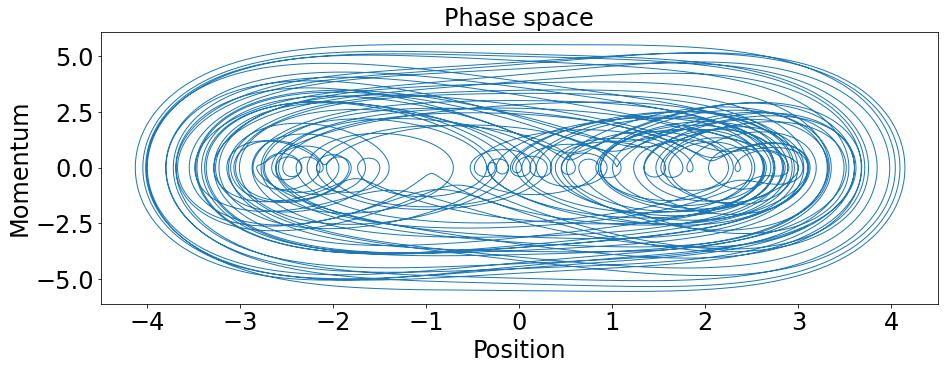

In [88]:
# Phase space
plt.figure(figsize=(15,5))

plt.figure(1)
plt.plot(xs[-int(30000):],velocity[-30000:],linewidth=1.0)
plt.title('Phase space',{'fontsize':24})
plt.xlim([-4.5,4.5])
plt.xlabel('Position',{'fontsize':24})
plt.ylabel('Momentum',{'fontsize':24})
plt.tick_params(axis='both',labelsize=24)

plt.show()

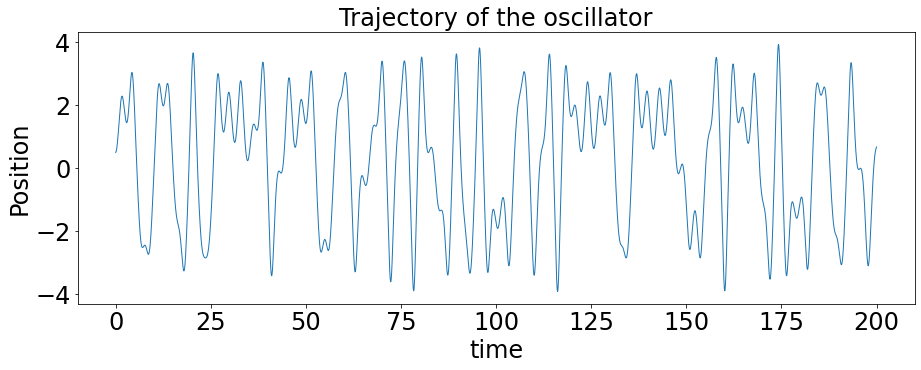

In [89]:
# Position timeseries
plt.figure(figsize=(15,5))

plt.figure(1)
plt.plot(t[0:20000],xs[0:20000],linewidth=1.0)

plt.title('Trajectory of the oscillator',{'fontsize':24})
plt.xlabel('time',{'fontsize':24})
plt.ylabel('Position',{'fontsize':24})
plt.tick_params(axis='both',labelsize=24)

plt.show()

In [ ]:
# Additional plot, useless for us

#plt.figure(figsize=(14,8))

#plt.figure(3)
#plt.scatter(strange_attractor[:,0],strange_attractor[:,1])
#plt.xlabel('Position',{'fontsize':24})
#plt.ylabel('Momentum',{'fontsize':24})
#plt.title(r'Poincare Plot (Phase space at time = $\frac{2\pi N}{\omega}$, N = 1,2,3...)',{'fontsize':24})
#plt.tick_params(axis='both',labelsize=24)

#### Duffing attractor - data saving

In [90]:
save_Duffing = False
if save_Duffing or save_data:
    np.savetxt(path_savedata + 'Duffing_timeseries.csv', xs, delimiter = " ", header = "")
    print(xs[0:5])

[0.5        0.50014834 0.50059307 0.50133367 0.50236956]


## Rabinovich Fabrikant attractor

#### Rabinovich Fabrikant attractor - generation

In [91]:
t1 = time.time() #times the computation
dataset = rsvp_d.rabinovich_fabrikant(2500, alpha=1.1, gamma=0.89, x0=[- 1, 0, 0.5], h=0.05)
xs = dataset[:,0]
ys = dataset[:,1]
zs = dataset[:,2]
t2 = time.time()
print ('computation takes ',t2-t1,' seconds.')

computation takes  0.225569486618042  seconds.


#### Rabinovich Fabrikant attractor - plots

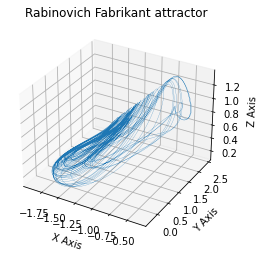

In [92]:
Plot3D(xs, ys, zs, "Rabinovich Fabrikant attractor", start=0, pt_number=2500, lw=0.2)

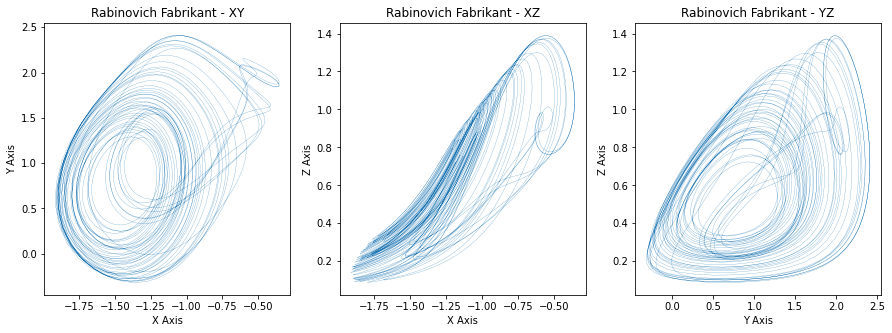

In [93]:
Plot2D(xs, ys, zs, "Rabinovich Fabrikant - XY", "Rabinovich Fabrikant - XZ", "Rabinovich Fabrikant - YZ", start=0, pt_number=2500, lw=0.2)

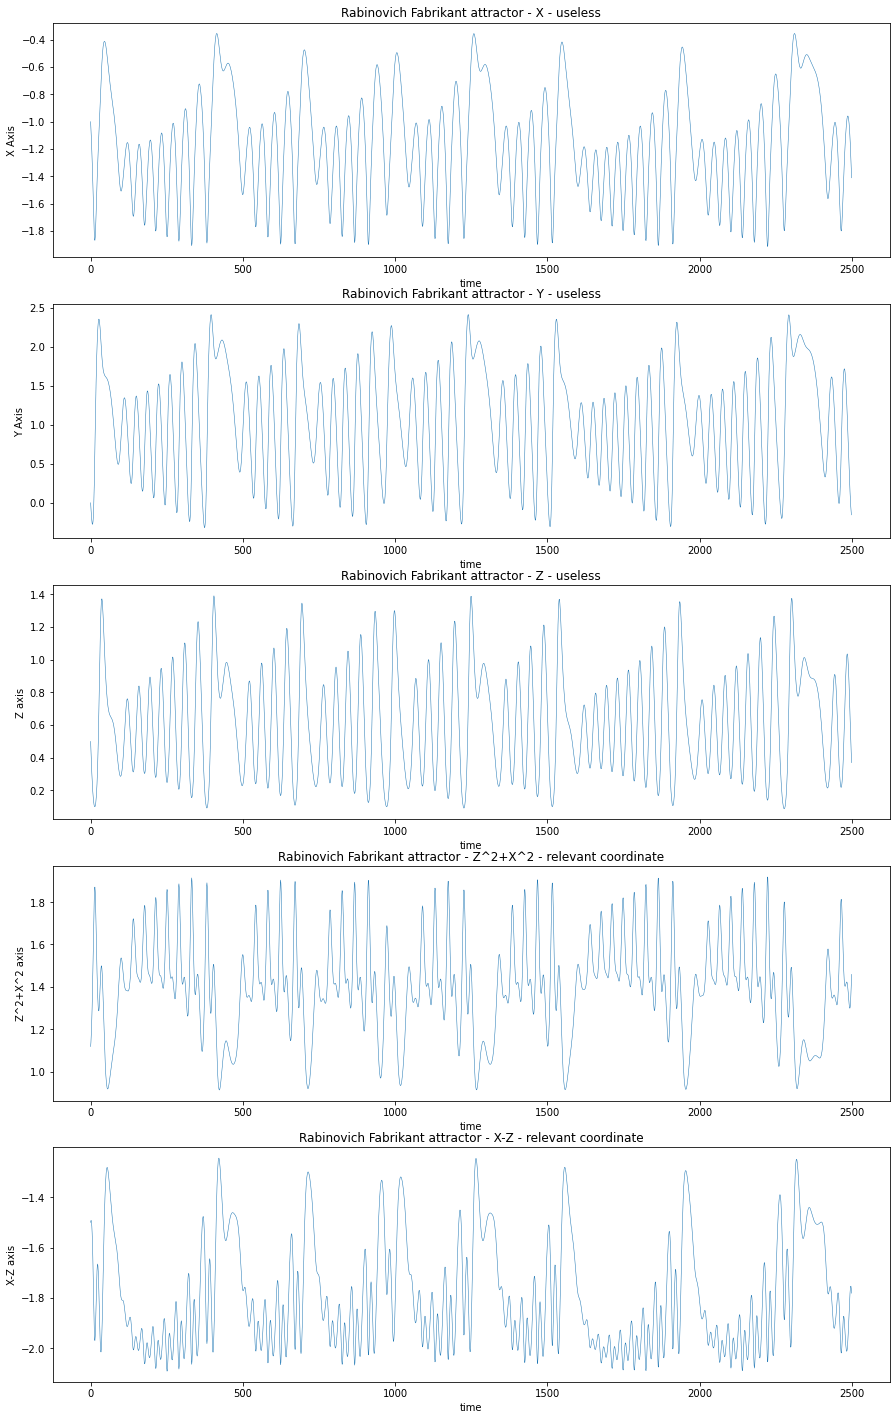

In [99]:
# Plot 1D - relevant coordinate

start = 0
pt_number = 2500
lw = 0.5

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize = (15, 25))

ax1.plot(xs[start:start+pt_number], lw=lw)
ax1.set_title("Rabinovich Fabrikant attractor - X - useless")
ax1.set_xlabel("time")
ax1.set_ylabel("X Axis")

ax2.plot(ys[start:start+pt_number], lw=lw)
ax2.set_title("Rabinovich Fabrikant attractor - Y - useless")
ax2.set_xlabel("time")
ax2.set_ylabel("Y Axis")

ax3.plot(zs[start:start+pt_number], lw=lw)
ax3.set_title("Rabinovich Fabrikant attractor - Z - useless")
ax3.set_xlabel("time")
ax3.set_ylabel("Z axis")

ax4.plot(np.sqrt(zs[start:start+pt_number]**2+xs[start:pt_number]**2), lw=lw)
ax4.set_title("Rabinovich Fabrikant attractor - Z^2+X^2 - relevant coordinate")
ax4.set_xlabel("time")
ax4.set_ylabel("Z^2+X^2 axis")

ax5.plot(xs[start:start+pt_number]-zs[start:pt_number], lw=lw)
ax5.set_title("Rabinovich Fabrikant attractor - X-Z - relevant coordinate")
ax5.set_xlabel("time")
ax5.set_ylabel("X-Z axis")

plt.show()

#### Rabinovich Fabrikant attractor - data saving

In [50]:
save_RabFab = False
if save_RabFab or save_data:
    np.savetxt(path_savedata + 'Rabinovich_Fabrikant_timeseries.csv', np.array([xs, ys, zs]).T, delimiter = " ", header = "")
    print(xs[0:5], "\n", ys[0:5], "\n", zs[0:5])

[-1.         -1.04647792 -1.09714625 -1.15231814 -1.21260182] 
 [ 0.         -0.07175335 -0.13599455 -0.1909601  -0.23458173] 
 [0.5        0.44623824 0.39529093 0.34762297 0.30363171]


## Multiscroll attractor 

#### Multiscroll attractor - generation

In [67]:
t1 = time.time() #times the computation
dataset = rsvp_d.multiscroll(100000, a=40.0, b=3.0, c=28.0, x0=[- 0.1, 0.5, - 0.6], h=0.01)
xs = dataset[:,0]
ys = dataset[:,1]
zs = dataset[:,2]
t2 = time.time()
print ('computation takes ',t2-t1,' seconds.')

computation takes  8.680163860321045  seconds.


#### Multiscroll attractor - plots

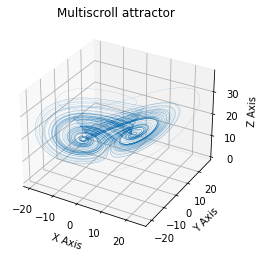

In [68]:
Plot3D(xs, ys, zs, "Multiscroll attractor", start=0, pt_number=10000, lw=0.1)

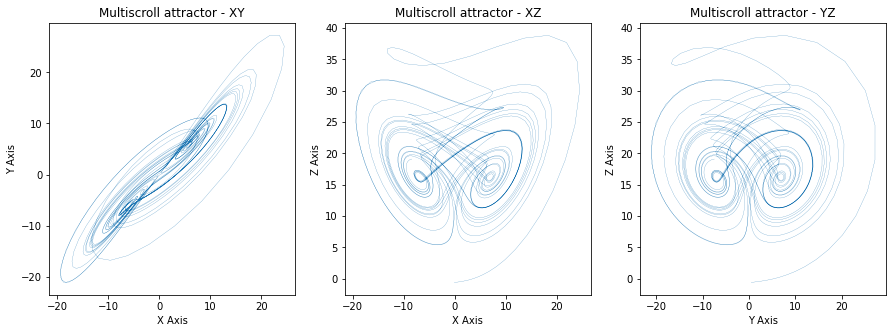

In [53]:
Plot2D(xs, ys, zs, "Multiscroll attractor - XY", "Multiscroll attractor - XZ", "Multiscroll attractor - YZ", start=0, pt_number=2500, lw=0.2)

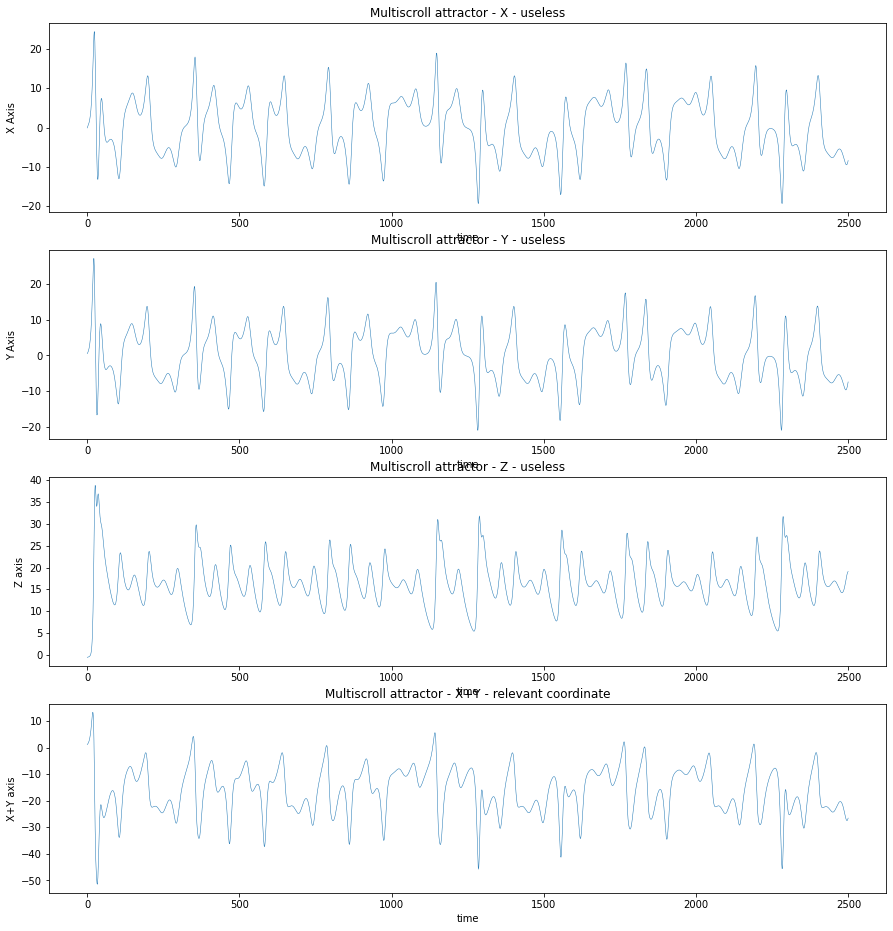

In [70]:
# Plot 1D - relevant coordinate

start = 0
pt_number = 2500
lw = 0.5


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 16))

ax1.plot(xs[start:start+pt_number], lw=lw)
ax1.set_title("Multiscroll attractor - X - useless")
ax1.set_xlabel("time")
ax1.set_ylabel("X Axis")

ax2.plot(ys[start:start+pt_number], lw=lw)
ax2.set_title("Multiscroll attractor - Y - useless")
ax2.set_xlabel("time")
ax2.set_ylabel("Y Axis")

ax3.plot(zs[start:start+pt_number], lw=lw)
ax3.set_title("Multiscroll attractor - Z - useless")
ax3.set_xlabel("time")
ax3.set_ylabel("Z axis")

ax4.plot(ys[start:start+pt_number] - zs[start:start+pt_number], lw=lw)
ax4.set_title("Multiscroll attractor - Y-Z - relevant coordinate")
ax4.set_xlabel("time")
ax4.set_ylabel("Y-Z axis")

plt.show()

#### Multiscroll attractor - data saving

In [57]:
save_multi = False
if save_multi or save_data:
    np.savetxt(path_savedata + 'Multiscroll_timeseries.csv', np.array([xs, ys, zs]).T, delimiter = " ", header = "")
    print(xs[0:5], "\n", ys[0:5], "\n", zs[0:5])

[-0.1         0.12547479  0.33335462  0.53855012  0.75453527] 
 [0.5        0.66029427 0.84393968 1.05971241 1.31746284] 
 [-0.6        -0.58214944 -0.56321007 -0.54244977 -0.51882888]


## Doublescroll attractor

#### Doublescroll attractor - generation

In [60]:
t1 = time.time() #times the computation
dataset = rsvp_d.doublescroll(2500, r1=1.2, r2=3.44, r4=0.193, ir=4.5e-05, beta=11.6, x0=[0.37926545, 0.058339, - 0.08167691], h=0.25)
xs = dataset[:,0]
ys = dataset[:,1]
zs = dataset[:,2]
t2 = time.time()
print ('computation takes ',t2-t1,' seconds.')

computation takes  1.3094658851623535  seconds.


#### Doublescroll attractor - plots

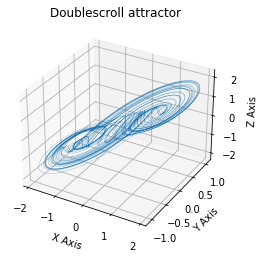

In [62]:
Plot3D(xs, ys, zs, "Doublescroll attractor", start=0, pt_number=2500, lw=0.2)

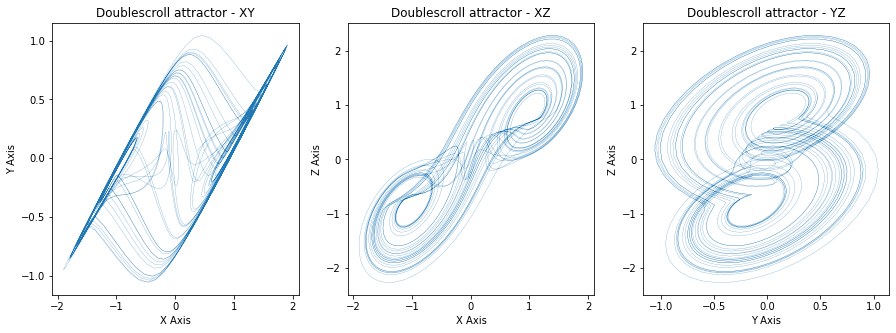

In [63]:
Plot2D(xs, ys, zs, "Doublescroll attractor - XY", "Doublescroll attractor - XZ", "Doublescroll attractor - YZ", start=0, pt_number=2500, lw=0.2)

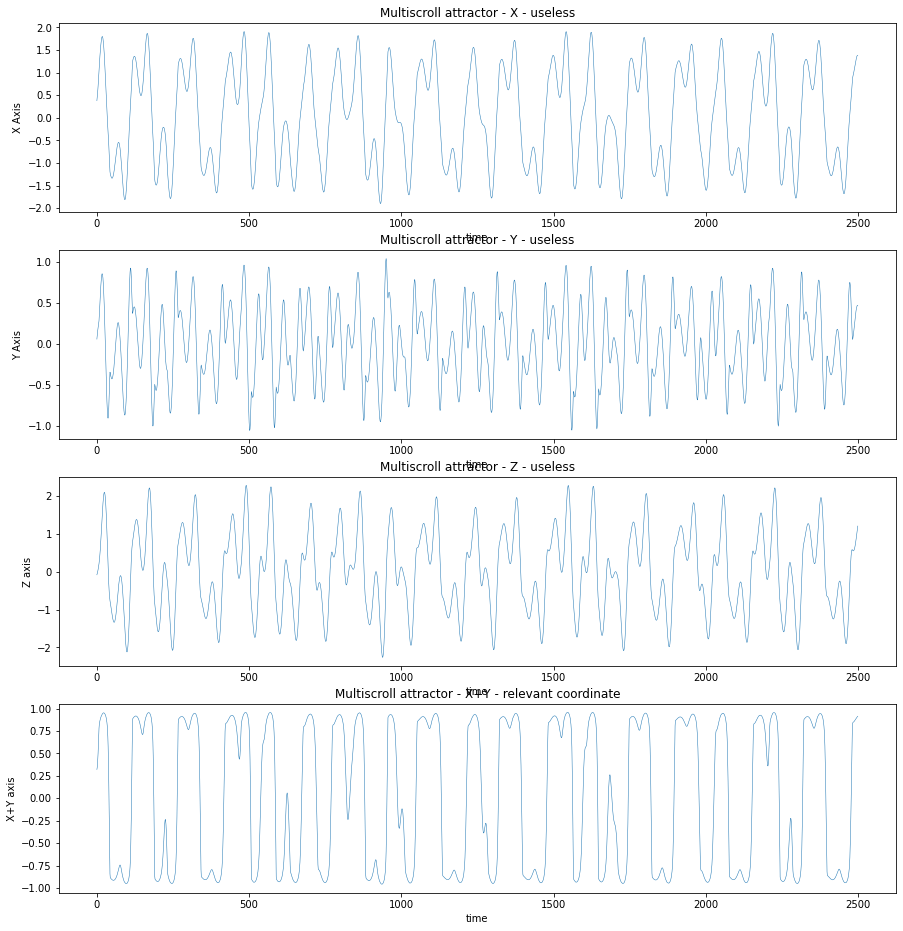

In [64]:
# Plot 1D - relevant coordinate

start = 0
pt_number = 2500
lw = 0.5

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 16))

ax1.plot(xs[start:start+pt_number], lw=lw)
ax1.set_title("Multiscroll attractor - X - useless")
ax1.set_xlabel("time")
ax1.set_ylabel("X Axis")

ax2.plot(ys[start:start+pt_number], lw=lw)
ax2.set_title("Multiscroll attractor - Y - useless")
ax2.set_xlabel("time")
ax2.set_ylabel("Y Axis")

ax3.plot(zs[start:start+pt_number], lw=lw)
ax3.set_title("Multiscroll attractor - Z - useless")
ax3.set_xlabel("time")
ax3.set_ylabel("Z axis")

ax4.plot(xs[start:start+pt_number] - ys[start:start+pt_number], lw=lw)
ax4.set_title("Multiscroll attractor - X-Y - relevant coordinate")
ax4.set_xlabel("time")
ax4.set_ylabel("X-Y axis")

plt.show()

#### Doublescroll attractor - data saving

In [66]:
save_double = False
if save_double or save_data:
    np.savetxt(path_savedata + 'Doublescroll_timeseries.csv', np.array([xs, ys, zs]).T, delimiter = " ", header = "")
    print(xs[0:5], "\n", ys[0:5], "\n", zs[0:5])

[0.37926545 0.44025767 0.51311208 0.59895596 0.69877582] 
 [0.058339   0.10022547 0.13724376 0.16888802 0.1954995 ] 
 [-0.08167691 -0.05832949 -0.02644107  0.01227471  0.05626882]


## NARMA

#### NARMA - generation

In [71]:
t1 = time.time() #times the computation
dataset = rsvp_d.narma(100000, order=30, a1=0.2, a2=0.04, b=1.5, c=0.001, x0=[0.0], seed=None)
xs = dataset[:,0]
t2 = time.time()
print ('computation takes ',t2-t1,' seconds.')

computation takes  3.9680960178375244  seconds.


#### NARMA - plots

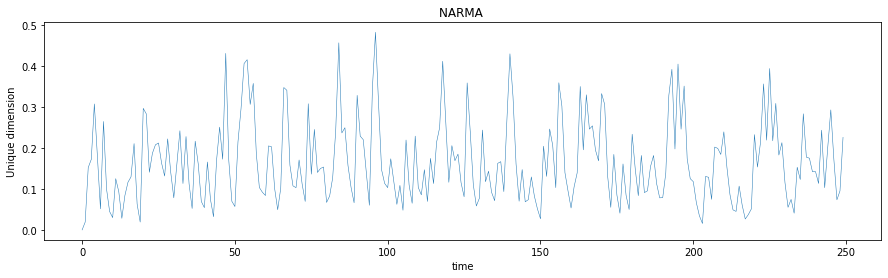

In [75]:
# Plot 1D - relevant coordinate

start = 0
pt_number = 250
lw = 0.5

fig, (ax) = plt.subplots(1, 1, figsize = (15, 4))

ax.plot(xs[start:start+pt_number], lw=lw)
ax.set_title("NARMA ")
ax.set_xlabel("time")
ax.set_ylabel("Unique dimension")

plt.show()

#### NARMA - data saving

In [76]:
save_NARMA = False
if save_NARMA or save_data:
    np.savetxt(path_savedata + 'NARMA_timeseries.csv', xs, delimiter = " ", header = "")
    print(xs[0:5])

[0.         0.01913194 0.1523692  0.17229804 0.30774408]


## Henon attractor

#### Henon attractor - generation

In [77]:
t1 = time.time() #times the computation
dataset = rsvp_d.henon_map(100000, a=1.4, b=0.3, x0=[0.0, 0.0])
xs = dataset[:,0]
t2 = time.time()
print ('computation takes ',t2-t1,' seconds.')

computation takes  0.4654810428619385  seconds.


#### Henon attractor - plots

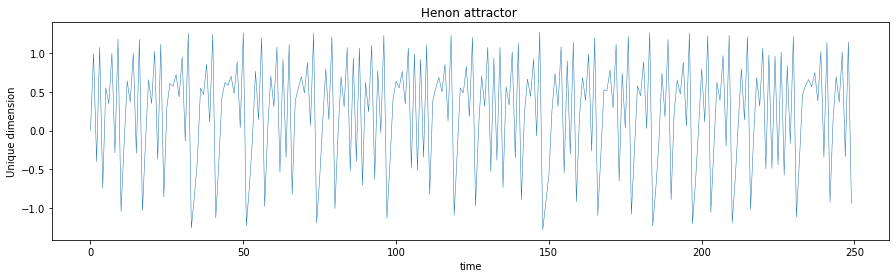

In [78]:

# Plot 1D - relevant coordinate
start = 0
pt_number = 250
lw = 0.5

fig, (ax) = plt.subplots(1, 1, figsize = (15, 4))

ax.plot(xs[start:start+pt_number], lw=lw)
ax.set_title("Henon attractor ")
ax.set_xlabel("time")
ax.set_ylabel("Unique dimension")

plt.show()

#### Henon  attractor - data saving 

In [79]:
save_Henon = False
if save_Henon or save_data:
    np.savetxt(path_savedata + 'Henon_timeseries.csv', xs, delimiter = " ", header = "")
    print(xs[0:5])

[ 0.         1.        -0.4        1.076     -0.7408864]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5cdd471f-323c-4549-bd3c-923dc8de9359' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>